In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
conn = sqlite3.connect("sales_data.db")
print("Database created and connected successfully")


Database created and connected successfully


In [4]:
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Sales table created")


Sales table created


In [5]:
sales_data = [
    ("Laptop", 5, 50000),
    ("Phone", 10, 20000),
    ("Tablet", 3, 30000),
    ("Laptop", 2, 50000),
    ("Phone", 5, 20000)
]

cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", sales_data)

conn.commit()
print("Sales data inserted")


Sales data inserted


In [6]:
df_all = pd.read_sql_query("SELECT * FROM sales", conn)
print(df_all)


   id product  quantity    price
0   1  Laptop         5  50000.0
1   2   Phone        10  20000.0
2   3  Tablet         3  30000.0
3   4  Laptop         2  50000.0
4   5   Phone         5  20000.0


In [7]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df_summary = pd.read_sql_query(query, conn)
print(df_summary)


  product  total_quantity   revenue
0  Laptop               7  350000.0
1   Phone              15  300000.0
2  Tablet               3   90000.0


In [8]:
for index, row in df_summary.iterrows():
    print(f"Product: {row['product']}")
    print(f"Total Quantity Sold: {row['total_quantity']}")
    print(f"Total Revenue: ₹{row['revenue']}")
    print("-" * 30)


Product: Laptop
Total Quantity Sold: 7
Total Revenue: ₹350000.0
------------------------------
Product: Phone
Total Quantity Sold: 15
Total Revenue: ₹300000.0
------------------------------
Product: Tablet
Total Quantity Sold: 3
Total Revenue: ₹90000.0
------------------------------


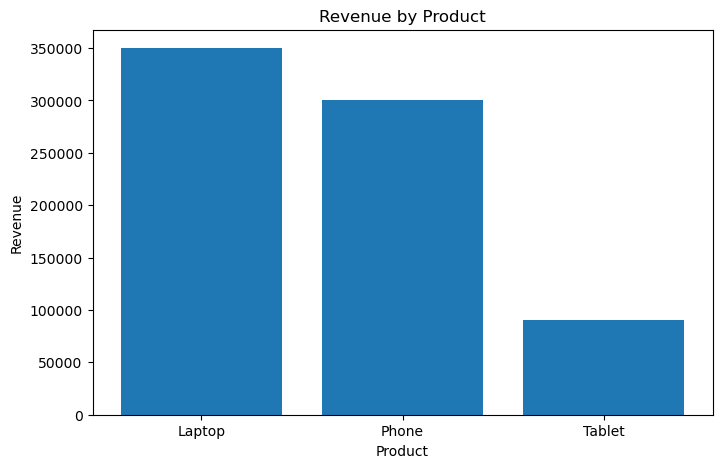

In [9]:
plt.figure(figsize=(8,5))
plt.bar(df_summary["product"], df_summary["revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show()


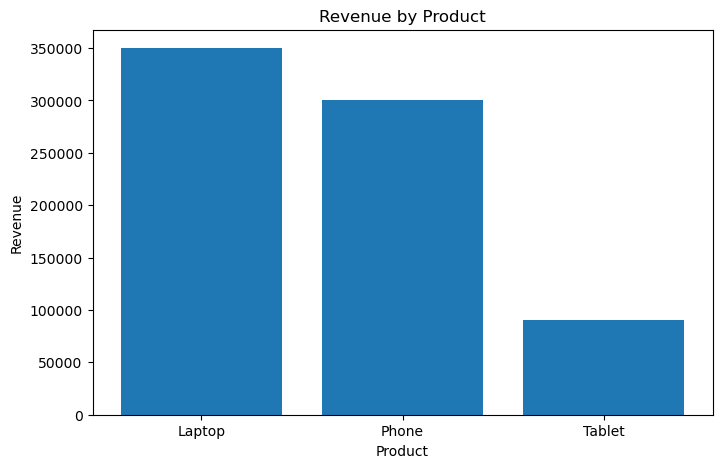

Chart saved as sales_chart.png


In [10]:
plt.figure(figsize=(8,5))
plt.bar(df_summary["product"], df_summary["revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.savefig("sales_chart.png")
plt.show()

print("Chart saved as sales_chart.png")
